<a href="https://colab.research.google.com/github/PhanThyAn/Lab-2_MayHoc/blob/main/Lab_4_20130195_PhanThiAn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# This lab is to continous dealing with **Logistic Regression**, **kNN**, and **Decision Tree** alogirthms applied to classification tasks. 

*   **Deadline: 23:59, 12/03/2023**



# Import libraries

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')
%cd '/content/gdrive/MyDrive/Lab-4'

Mounted at /content/gdrive
/content/gdrive/MyDrive/Lab-4


In [2]:
import matplotlib.pyplot as plt
import pandas as pd

In [13]:
# code
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from numpy import append
from sklearn import tree


#Task 1. 
Apply **LogisticRegression** to iris dataset which aims at classifying species of iris based on sepal_length (chiều dài đài hoa), sepal_width, petal_length (chiều dài cánh hoa), petal_width. The species are '**setosa**' '**versicolor**' and '**virginica**'. 



```
from sklearn import datasets
data4 = datasets.load_iris()
```




In [5]:
# code
from sklearn import datasets

dataset = datasets.load_iris()
dataset
X = dataset.data
y = dataset.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
classifier = LogisticRegression(random_state = 0) 
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred) 


In [ ]:
print ("Accuracy : ", accuracy_score(y_test, y_pred)) 

Accuracy :  0.9777777777777777


Confusion Matrix : 
 [[14  0  0]
 [ 0 17  1]
 [ 0  0 13]]


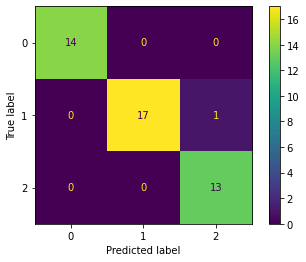

In [ ]:
cm = confusion_matrix(y_test, y_pred)
print ("Confusion Matrix : \n", cm)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

#Task 2. 
Apply LogisticRegression to **MNIST** dataset (mnist.csv) which aims at classifying handwritten digits. Dataset includes 784 pixels values of images (28x28). 


```
from sklearn import datasets
# load the MNIST digits dataset
mnist = datasets.load_digits()
```



In [ ]:
# code
from sklearn import datasets
# load the MNIST digits dataset
mnist = datasets.load_digits()

X = mnist.data
y = mnist.target
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=1)
classifier = LogisticRegression(random_state = 0) 
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred) 



/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
print ("Accuracy : ", accuracy_score(y_test, y_pred)) 

Accuracy :  0.9685185185185186


Confusion Matrix : 
 [[59  0  0  0  0  0  0  0  0  0]
 [ 0 48  0  0  1  0  0  0  0  0]
 [ 0  0 49  0  0  0  0  0  0  0]
 [ 0  0  1 61  0  0  0  1  1  0]
 [ 0  1  0  0 60  0  0  0  0  0]
 [ 0  1  1  1  0 43  0  0  0  1]
 [ 0  0  0  0  0  0 51  0  0  0]
 [ 0  0  0  1  1  0  0 54  0  1]
 [ 0  0  1  0  0  1  0  0 44  0]
 [ 0  1  0  0  0  1  0  0  1 54]]


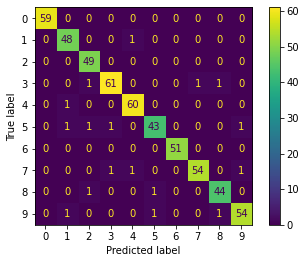

In [ ]:
cm = confusion_matrix(y_test, y_pred)
print ("Confusion Matrix : \n", cm)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

#Task 3. 
Apply another classification algorithm named kNN, which is an instance classifcation model. 
*  3.1. Perform kNN algorithm to Iris dataset with k={1, 3, 5, …, 29}. Select the best value of k.

*   3.2. Then compare the obtained results with those using Logistic regression (based on metrics: accuracy, precision, recall, f1 measure).


In [ ]:
import re
from os import read
# code
k_range = range(1, 30, 2)
accs =[ ]
precision= [ ]
recalls = []
f1measure = [ ]
for i in k_range:
  kNM = KNeighborsClassifier(n_neighbors=i);
  kNM.fit(X_train, y_train)
  y_pred = kNM.predict(X_test)
  accs.append(metrics.accuracy_score(y_test, y_pred))
  precision.append(metrics.precision_score(y_test, y_pred, average='macro'))
  recalls.append(metrics.recall_score(y_test, y_pred, average='macro'))
  f1measure.append(metrics.f1_score(y_test, y_pred, average='macro'))


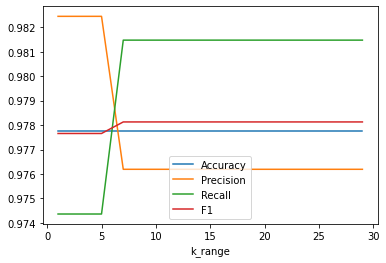

In [ ]:
plt.plot(k_range, accs, label= 'Accuracy') 
plt.plot(k_range, precision, label= 'Precision') 
plt.plot(k_range, recalls, label= 'Recall') 
plt.plot(k_range, f1measure, label='F1') 
plt.xlabel("k_range") 
#plt.ylabel("Tesing Accuracy")
plt.legend()

#Task 4. 
Similar to Task 3, apply kNN algorithm to **mnist** dataset which included in datasets of sklearn API.
*  4.1.	Perform kNN algorithm to Iris dataset with k={1, 3, 5, …, 29}. Select the best value of k.
*  4.2.	Then compare the obtained results with those using Logistic regression (based on metrics: accuracy, precision, recall, f1 measure).


In [ ]:
# code
k = range(1,30,2);
acccs = [];
precss = [];
recalls = [];
f1s = [];
for i in k:
  knm = KNeighborsClassifier(n_neighbors=i)
  knm.fit(X_train, y_train)
  y_pred = knm.predict(X_test)
  acccs.append(metrics.accuracy_score(y_test, y_pred))
  precss.append(metrics.precision_score(y_test, y_pred,average='macro'))
  recalls.append(metrics.recall_score(y_test, y_pred,average='macro'))
  f1s.append(metrics.f1_score(y_test, y_pred,average='macro'))

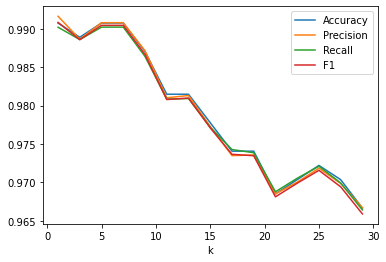

In [ ]:
plt.plot(k, acccs, label= 'Accuracy') 
plt.plot(k, precss, label= 'Precision') 
plt.plot(k, recalls, label= 'Recall') 
plt.plot(k, f1s, label='F1') 
plt.xlabel("k") 
#plt.ylabel("Tesing Accuracy")
plt.legend()

#Task 5. 
Compare the performance of selected classification algorithms (**Decision Treen, kNN, and Logistic Regression**) to ***spam detection***. The dataset can be accessed from the link: http://archive.ics.uci.edu/ml/datasets/Spambase 
Attribute Information:
The last column of 'spambase.csv denotes whether the e-mail was considered spam (1) or not (0), i.e. unsolicited commercial e-mail. Most of the attributes indicate whether a particular word or character was frequently occuring in the e-mail. The run-length attributes (55-57) measure the length of sequences of consecutive capital letters. For the statistical measures of each attribute, see the end of this file. Here are the definitions of the attributes: 
*  48 continuous real [0,100] attributes of type word_freq_WORD 
= percentage of words in the e-mail that match WORD, i.e. 100 * (number of times the WORD appears in the e-mail) / total number of words in e-mail. A "word" in this case is any string of alphanumeric characters bounded by non-alphanumeric characters or end-of-string. **Example**: word_freq_address: percentage of words in the e-mail that match ADDRESS.
*  6 continuous real [0,100] attributes of type char_freq_CHAR] 
= percentage of characters in the e-mail that match CHAR, i.e. 100 * (number of CHAR occurences) / total characters in e-mail
*  1 continuous real [1,...] attribute of type capital_run_length_average 
= average length of uninterrupted sequences of capital letters
*  1 continuous integer [1,...] attribute of type capital_run_length_longest 
= length of longest uninterrupted sequence of capital letters
*  1 continuous integer [1,...] attribute of type capital_run_length_total = sum of length of uninterrupted sequences of capital letters = total number of capital letters in the e-mail
*  1 nominal {0,1} class attribute of type spam = denotes whether the e-mail was considered spam (1) or not (0), i.e. unsolicited commercial e-mail. 


---


In order to compare the performance of selected algorithms, some common metrics including **accuracy, precision, recall, f1 measures** could be used.


/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[0 0 1 ... 1 0 0]
Accuracy :  0.9840695148443157
Precision :  0.9850187265917603
Recall :  0.9740740740740741
F1 :  0.9795158286778398
[[833   8]
 [ 14 526]]


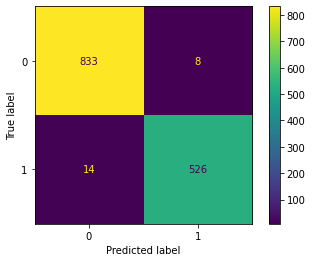

In [7]:
from sklearn.metrics.cluster import entropy
# code
dataset = pd.read_csv('spambase.csv')


X =  dataset.iloc[:, :58].values
y= dataset[['class']]
X_train,X_test,y_train,y_test= train_test_split(X, y, test_size=0.3,random_state=1)

classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
print(y_pred)

print ("Accuracy : ", metrics.accuracy_score(y_test, y_pred)) 
print ("Precision : ", metrics.precision_score(y_test, y_pred)) 
print ("Recall : ", metrics.recall_score(y_test, y_pred)) 
print ("F1 : ", metrics.f1_score(y_test, y_pred)) 
print(metrics.confusion_matrix(y_test, y_pred))
print(metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred))
  # dua vao entropy, gini

/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for exam

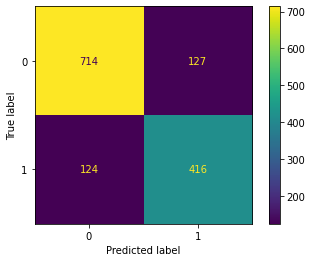

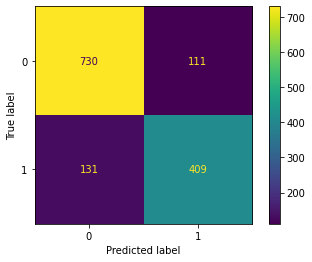

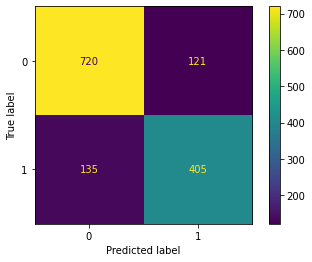

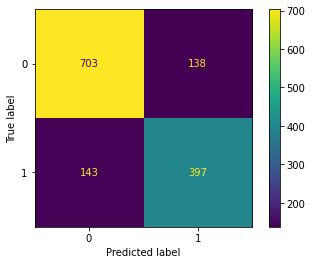

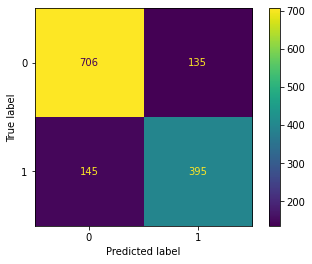

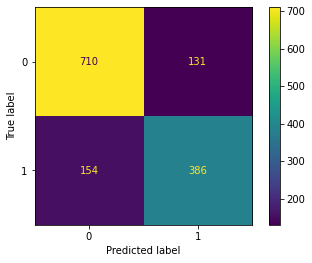

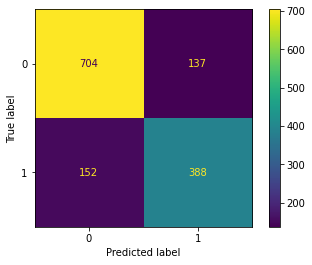

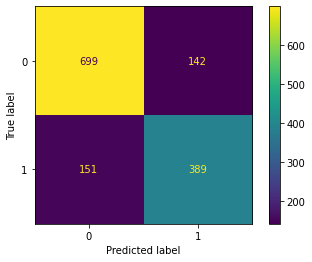

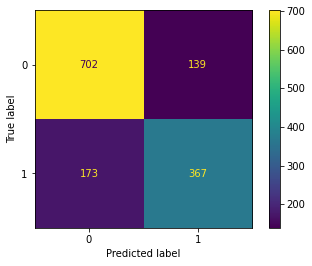

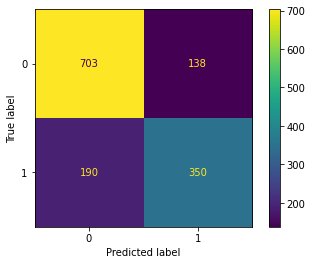

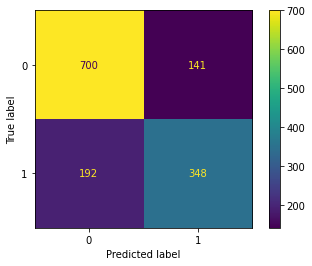

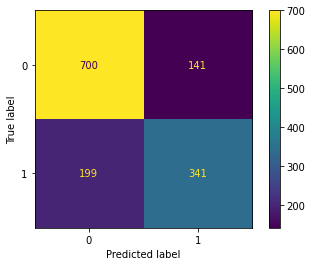

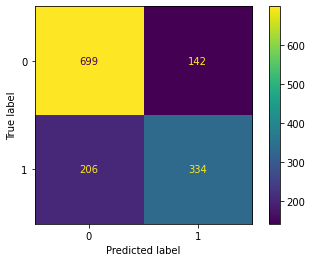

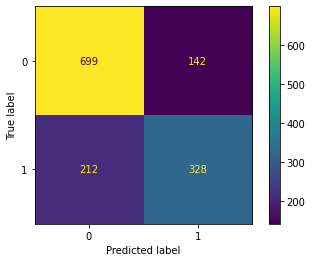

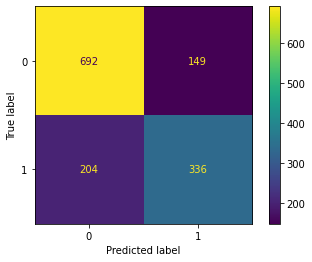

In [10]:
k = range(1,30,2);
acccs = [];
precss = [];
recalls = [];
f1s = [];
for i in k:
  knm = KNeighborsClassifier(n_neighbors=i)
  knm.fit(X_train, y_train)
  y_pred = knm.predict(X_test)
  acccs.append(metrics.accuracy_score(y_test, y_pred))
  precss.append(metrics.precision_score(y_test, y_pred,average='macro'))
  recalls.append(metrics.recall_score(y_test, y_pred))
  f1s.append(metrics.f1_score(y_test, y_pred))
  metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

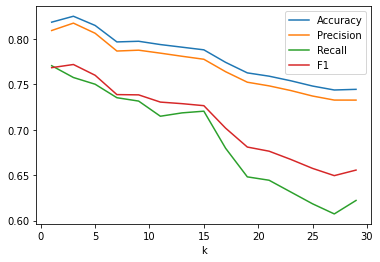

In [11]:
plt.plot(k, acccs, label= 'Accuracy') 
plt.plot(k, precss, label= 'Precision') 
plt.plot(k, recalls, label= 'Recall') 
plt.plot(k, f1s, label='F1') 
plt.xlabel("k") 
#plt.ylabel("Tesing Accuracy")
plt.legend()

In [14]:
decision_tree = tree.DecisionTreeClassifier(random_state=50)
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=50)

[1 1 1 ... 1 0 0]
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1: 1.0


[Text(0.5, 0.75, 'x[57] <= 0.5\ngini = 0.478\nsamples = 3220\nvalue = [1947, 1273]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 1947\nvalue = [1947, 0]'),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 1273\nvalue = [0, 1273]')]

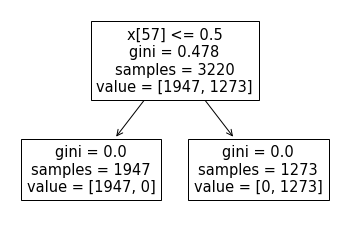

In [15]:
y_pred = decision_tree.predict(X_test)
print(y_pred)
tree_ac = metrics.accuracy_score(y_test, y_pred)
tree_ps = metrics.precision_score(y_test, y_pred)
tree_rs = metrics.recall_score(y_test,y_pred)
tree_fs = metrics.f1_score(y_test, y_pred)
print('Accuracy:', tree_ac)
print('Precision:', tree_ps)
print('Recall:', tree_rs)
print('F1:', tree_fs)
tree.plot_tree(decision_tree)

#Finally,
Save a copy in your Github. Remember renaming the notebook.